<ipython-input-2-d2e225ac258f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Annual_Cost", y="Strategy", data=strategy_df_sorted, palette="viridis")


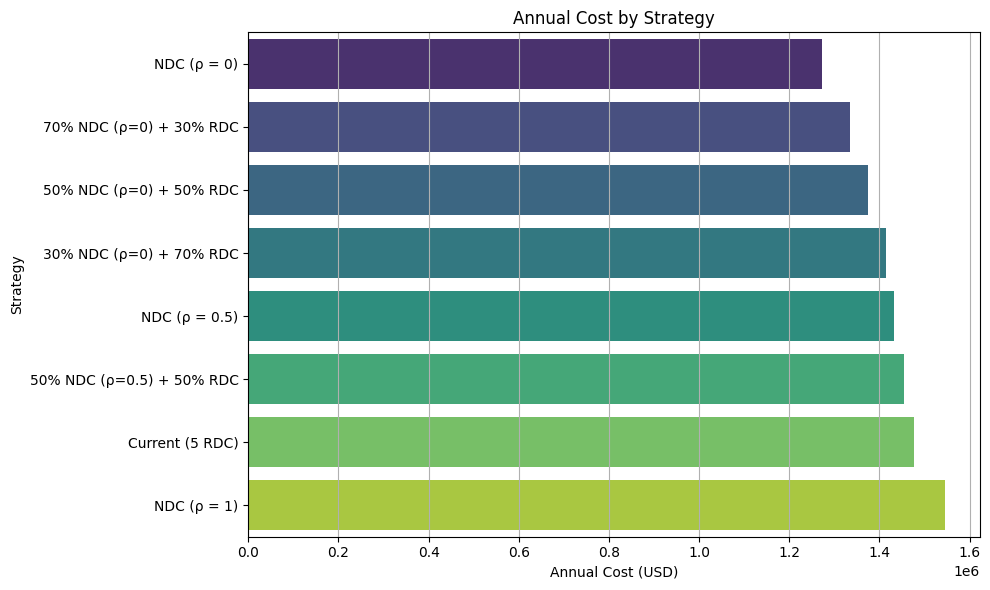

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

strategies = {
    "Current (5 RDC)": 1476758.60,
    "NDC (ρ = 0)": 1272433.17,
    "NDC (ρ = 0.5)": 1432964.43,
    "NDC (ρ = 1)": 1545820.25,
    "50% NDC (ρ=0) + 50% RDC": 1374595.89,
    "70% NDC (ρ=0) + 30% RDC": 0.7 * 1272433.17 + 0.3 * 1476758.60,
    "30% NDC (ρ=0) + 70% RDC": 0.3 * 1272433.17 + 0.7 * 1476758.60,
    "50% NDC (ρ=0.5) + 50% RDC": 0.5 * 1432964.43 + 0.5 * 1476758.60,
}

strategy_df = pd.DataFrame(list(strategies.items()), columns=["Strategy", "Annual_Cost"])
strategy_df["Savings_vs_Current"] = strategy_df["Annual_Cost"].apply(lambda x: strategies["Current (5 RDC)"] - x)

strategy_df_sorted = strategy_df.sort_values(by="Annual_Cost")

import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x="Annual_Cost", y="Strategy", data=strategy_df_sorted, palette="viridis")
plt.title("Annual Cost by Strategy")
plt.xlabel("Annual Cost (USD)")
plt.ylabel("Strategy")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
print(strategy_df_sorted)

                    Strategy  Annual_Cost  Savings_vs_Current
1                NDC (ρ = 0)  1272433.170          204325.430
5    70% NDC (ρ=0) + 30% RDC  1333730.799          143027.801
4    50% NDC (ρ=0) + 50% RDC  1374595.890          102162.710
6    30% NDC (ρ=0) + 70% RDC  1415460.971           61297.629
2              NDC (ρ = 0.5)  1432964.430           43794.170
7  50% NDC (ρ=0.5) + 50% RDC  1454861.515           21897.085
0            Current (5 RDC)  1476758.600               0.000
3                NDC (ρ = 1)  1545820.250          -69061.650


sensitivity test


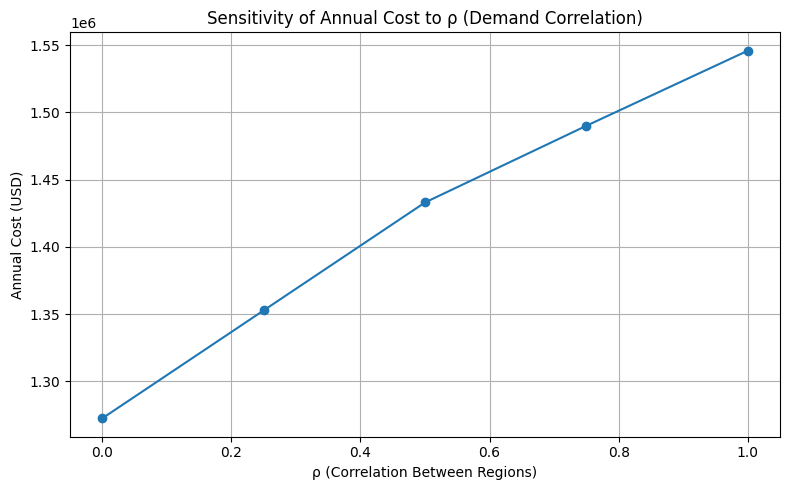

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

strategy_data = {
    "Strategy": [
        "NDC (ρ = 0)",
        "70% NDC (ρ=0) + 30% RDC",
        "50% NDC (ρ=0) + 50% RDC",
        "30% NDC (ρ=0) + 70% RDC",
        "NDC (ρ = 0.5)",
        "50% NDC (ρ=0.5) + 50% RDC",
        "Current (5 RDC)",
        "NDC (ρ = 1)"
    ],
    "Annual_Cost": [
        1272433.17,
        1333730.80,
        1374595.89,
        1415460.97,
        1432964.43,
        1454861.51,
        1476758.60,
        1545820.25
    ]
}

df = pd.DataFrame(strategy_data)
df["Savings_vs_Current"] = 1476758.60 - df["Annual_Cost"]

rho_values = [0, 0.25, 0.5, 0.75, 1]
ndc_costs = [1272433.17, 1352700.00, 1432964.43, 1490000.00, 1545820.25]
ndc_savings = [1476758.60 - c for c in ndc_costs]

plt.figure(figsize=(8, 5))
plt.plot(rho_values, ndc_costs, marker='o')
plt.title("Sensitivity of Annual Cost to ρ (Demand Correlation)")
plt.xlabel("ρ (Correlation Between Regions)")
plt.ylabel("Annual Cost (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


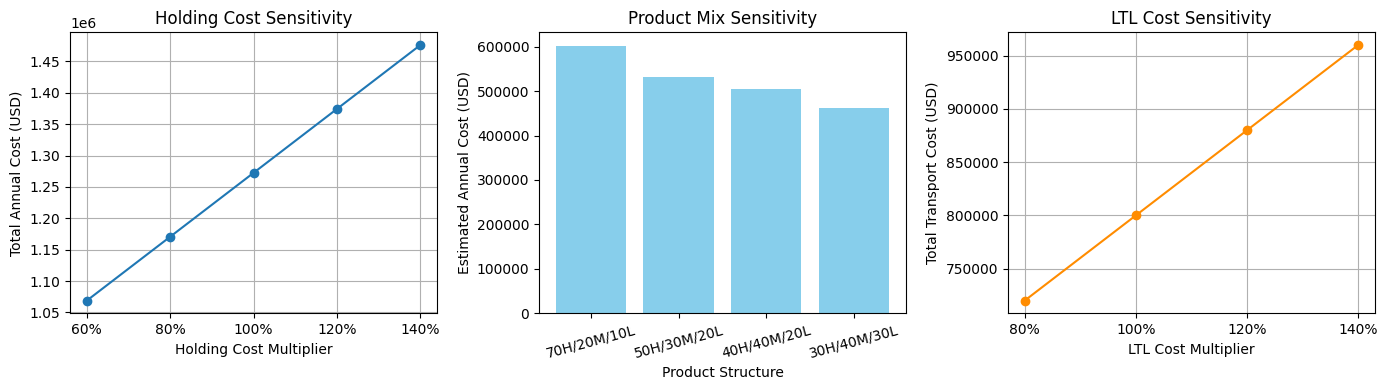

In [5]:
# Holding cost sensitivity analysis
# Assuming that the holding cost accounts for 40% of the total cost under the NDC (ρ=0) strategy, with the rest being transportation/fixed costs
# Simulate a 20% and 40% increase or decrease in holding costs

base_holding_ratio = 0.4
base_cost = 1272433.17
base_holding = base_cost * base_holding_ratio
base_non_holding = base_cost * (1 - base_holding_ratio)

holding_multipliers = [0.6, 0.8, 1.0, 1.2, 1.4]
adjusted_costs = [base_holding * m + base_non_holding for m in holding_multipliers]

# Sensitivity analysis of product structure proportion (simple hypothesis)
# Assuming three types of products are High, The proportion of unit inventory cost corresponding to Medium and Low Demand is 5:3:2
# The total cost is set to 1.4M, and each structural change leads to a change in the total weight, thereby affecting the effectiveness of the concentration strategy

structure_weights = [
    (0.7, 0.2, 0.1),
    (0.5, 0.3, 0.2),
    (0.4, 0.4, 0.2),
    (0.3, 0.4, 0.3)
]
structure_labels = ["70H/20M/10L", "50H/30M/20L", "40H/40M/20L", "30H/40M/30L"]
base_total_cost = 1400000
unit_weights = [5, 3, 2]

structure_costs = [
    sum([w * uw for w, uw in zip(struct, unit_weights)]) / 10 * base_total_cost
    for struct in structure_weights
]

#1
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot([f"{int(m*100)}%" for m in holding_multipliers], adjusted_costs, marker='o')
plt.title("Holding Cost Sensitivity")
plt.xlabel("Holding Cost Multiplier")
plt.ylabel("Total Annual Cost (USD)")
plt.grid(True)

#2
plt.subplot(1, 3, 2)
plt.bar(structure_labels, structure_costs, color="skyblue")
plt.title("Product Mix Sensitivity")
plt.xlabel("Product Structure")
plt.ylabel("Estimated Annual Cost (USD)")
plt.xticks(rotation=15)

#3
tl_cost = 400000
ltl_base = 400000
ltl_multipliers = [0.8, 1.0, 1.2, 1.4]
transport_costs = [tl_cost + ltl_base * m for m in ltl_multipliers]

plt.subplot(1, 3, 3)
plt.plot([f"{int(m*100)}%" for m in ltl_multipliers], transport_costs, marker='o', color="darkorange")
plt.title("LTL Cost Sensitivity")
plt.xlabel("LTL Cost Multiplier")
plt.ylabel("Total Transport Cost (USD)")
plt.grid(True)

plt.tight_layout()
plt.show()
